In [1]:
experimento = 'Experimento para probar el mejor learning rate del optimizador Adam'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para probar el mejor learning rate del optimizador Adam 


In [8]:
#hyper parameters
    #Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
    # numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 20000

input_size = 38
num_classes = 12

hidden_size = 100
num_epochs = 500
batch_size = 256
# learning_rate = 0.001
list_learning_rate = [1e-3, 1e-2, 1e-1]   #lr tiene incremento logaritmico 10^-2 --> 0.01

num_splits = 10

nTest = 0.2

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [10]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 20000
[5475, 1204, 2342, 2068, 1445, 332, 368, 4003, 0, 1537, 1226, 0]


<BarContainer object of 12 artists>

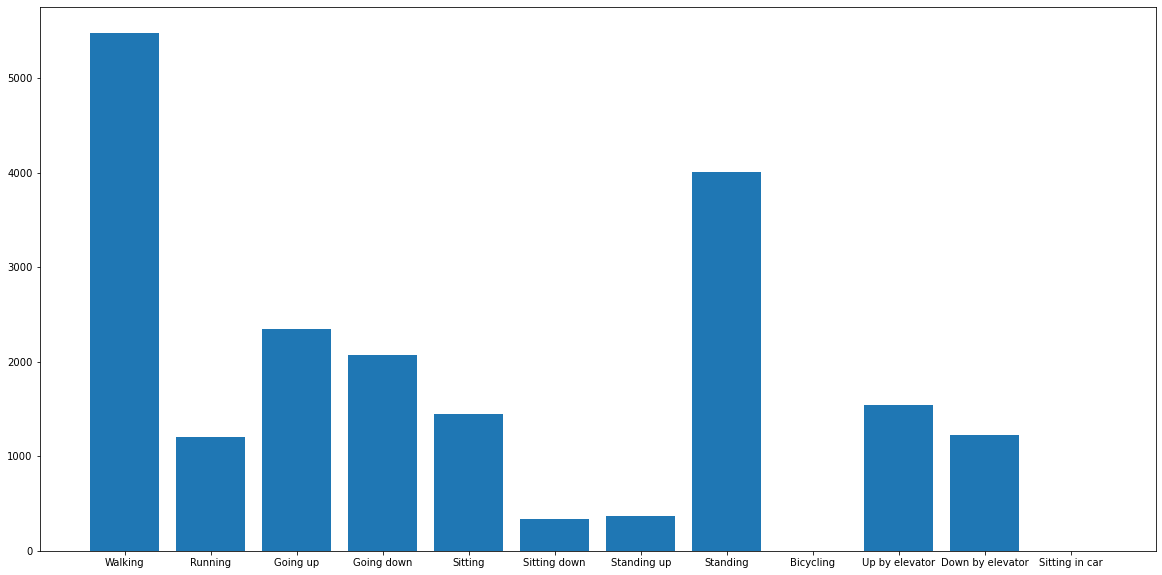

In [12]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

============ Launch with 20000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 100 Hidden neurons ============


loss 0.66173 acc 0.61912: 100%|██████████| 500/500 [06:55<00:00,  1.20it/s]

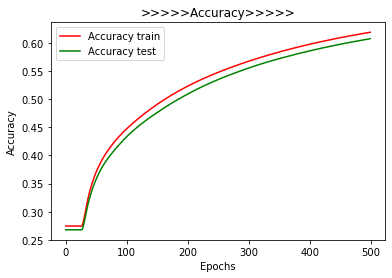

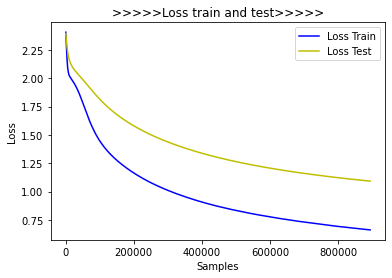

Accuracy de validación con kFold 0.7036830357142857
Accuracy Train: 0.7123125 
Accuracy Test: 0.7075 
Diferencia entre train y test: 0.004812499999999997

 


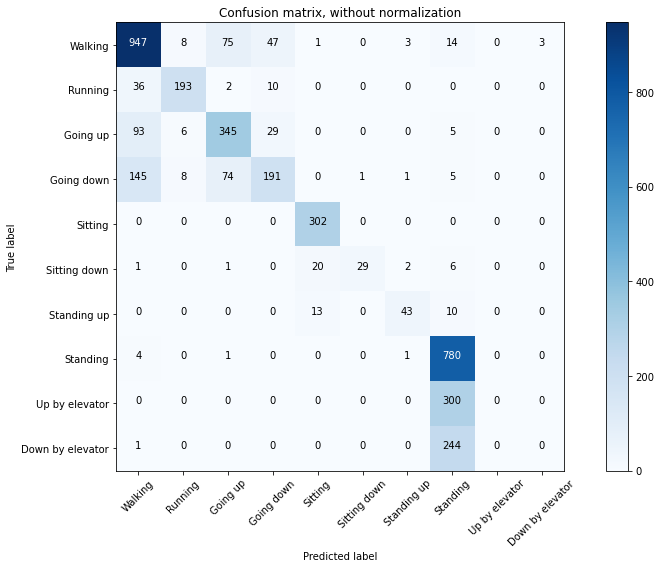

loss 0.62336 acc 0.62893: 100%|██████████| 500/500 [06:52<00:00,  1.22it/s]

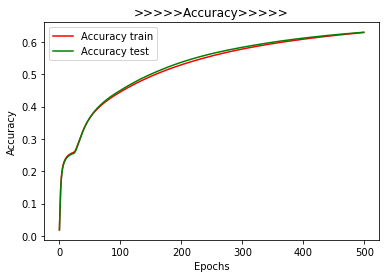

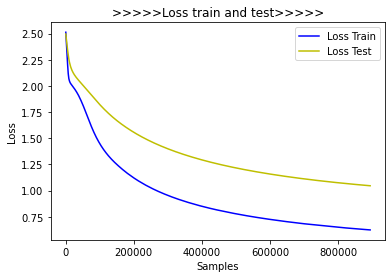

Accuracy de validación con kFold 0.7045200892857143
Accuracy Train: 0.714625 
Accuracy Test: 0.71325 
Diferencia entre train y test: 0.001374999999999904

 


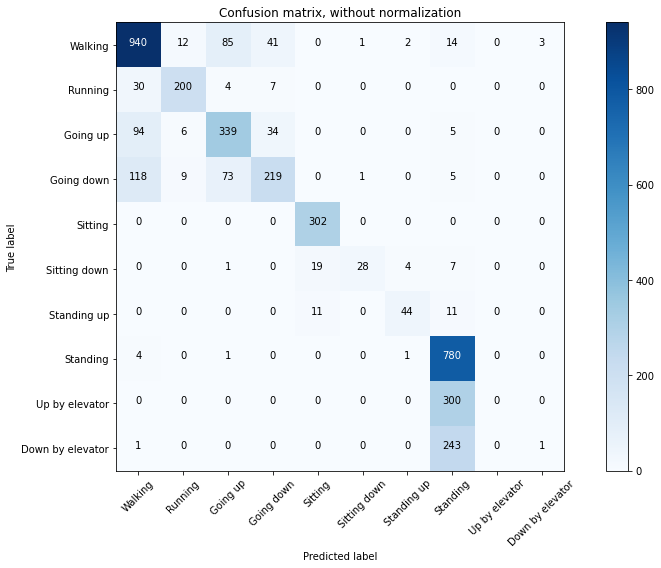

loss 0.62922 acc 0.62401: 100%|██████████| 500/500 [06:51<00:00,  1.22it/s]

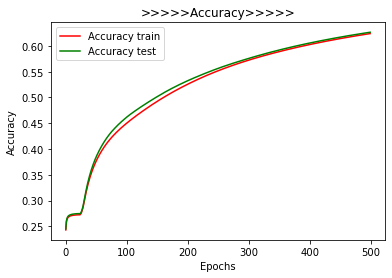

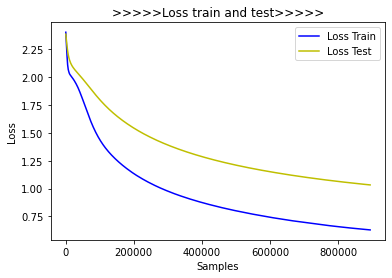

Accuracy de validación con kFold 0.7081473214285715
Accuracy Train: 0.7146875 
Accuracy Test: 0.708 
Diferencia entre train y test: 0.006687500000000068

 


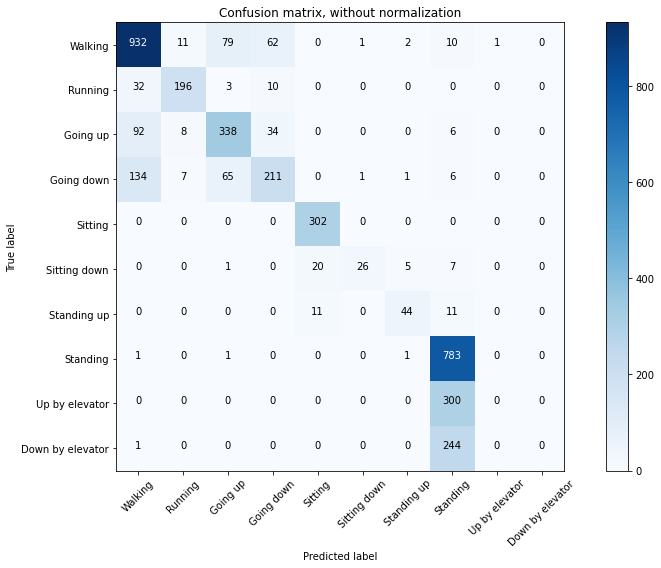

loss 0.61531 acc 0.62690: 100%|██████████| 500/500 [06:52<00:00,  1.22it/s]

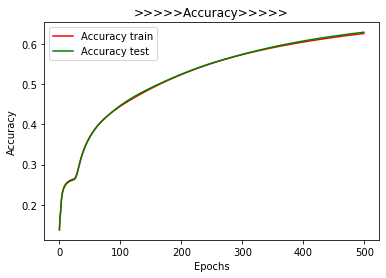

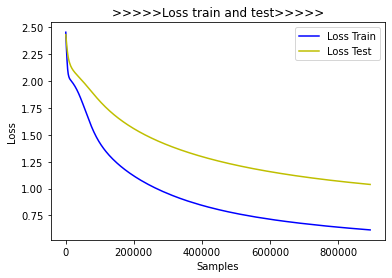

Accuracy de validación con kFold 0.7114955357142858
Accuracy Train: 0.7185 
Accuracy Test: 0.708 
Diferencia entre train y test: 0.010500000000000065

 


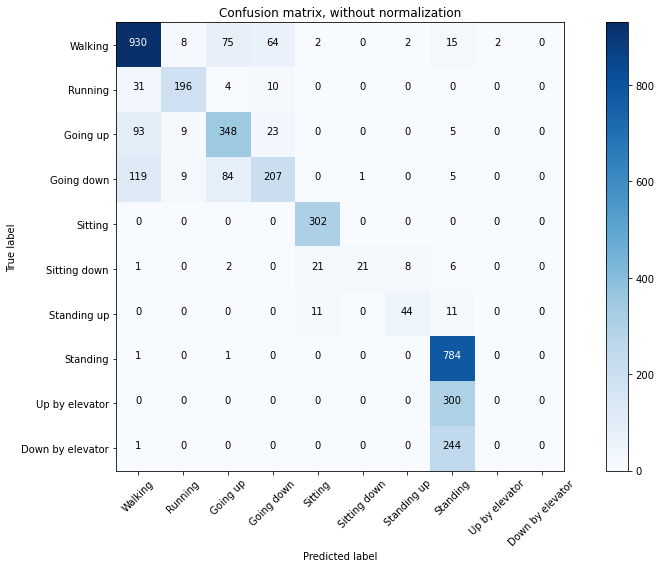

loss 0.65035 acc 0.62167: 100%|██████████| 500/500 [06:49<00:00,  1.22it/s]

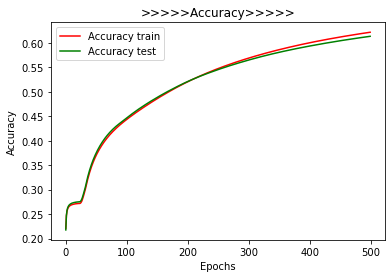

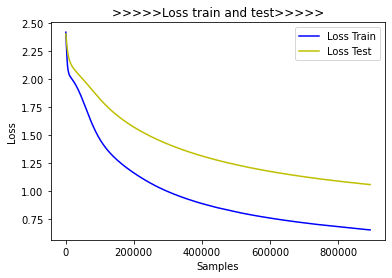

Accuracy de validación con kFold 0.7090401785714286
Accuracy Train: 0.7113125 
Accuracy Test: 0.70725 
Diferencia entre train y test: 0.004062499999999969

 


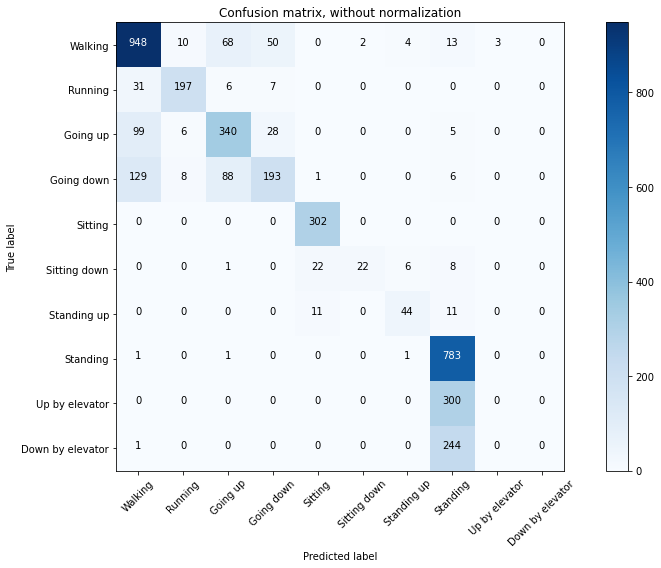

loss 0.64280 acc 0.61605: 100%|██████████| 500/500 [06:47<00:00,  1.23it/s]

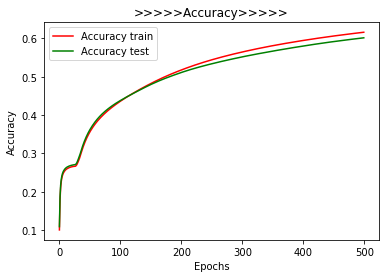

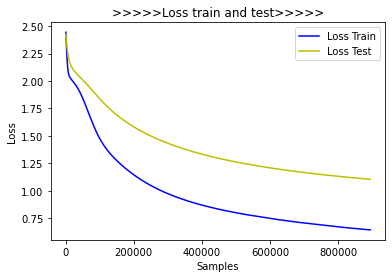

Accuracy de validación con kFold 0.7068452380952381
Accuracy Train: 0.708625 
Accuracy Test: 0.7015 
Diferencia entre train y test: 0.007124999999999937

 


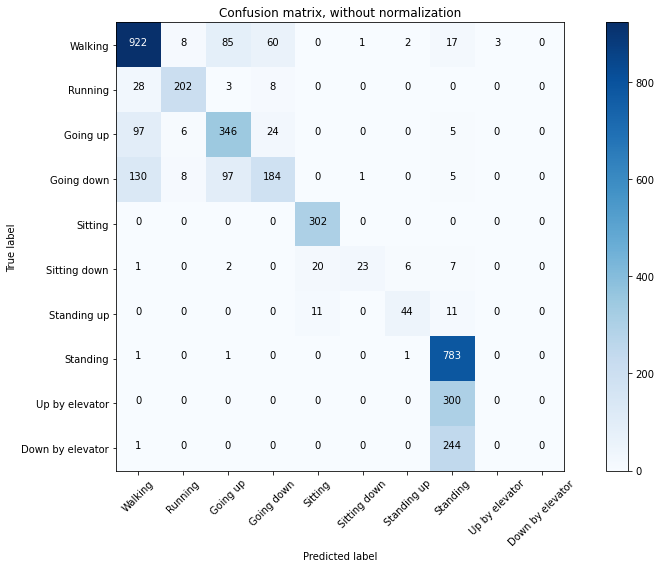

loss 0.59743 acc 0.63369: 100%|██████████| 500/500 [06:47<00:00,  1.22it/s]

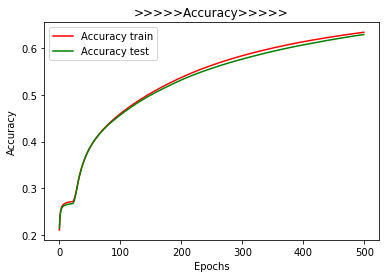

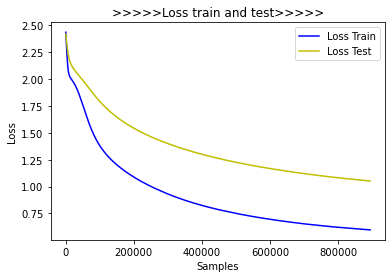

Accuracy de validación con kFold 0.7092633928571429
Accuracy Train: 0.720375 
Accuracy Test: 0.7165 
Diferencia entre train y test: 0.003874999999999962

 


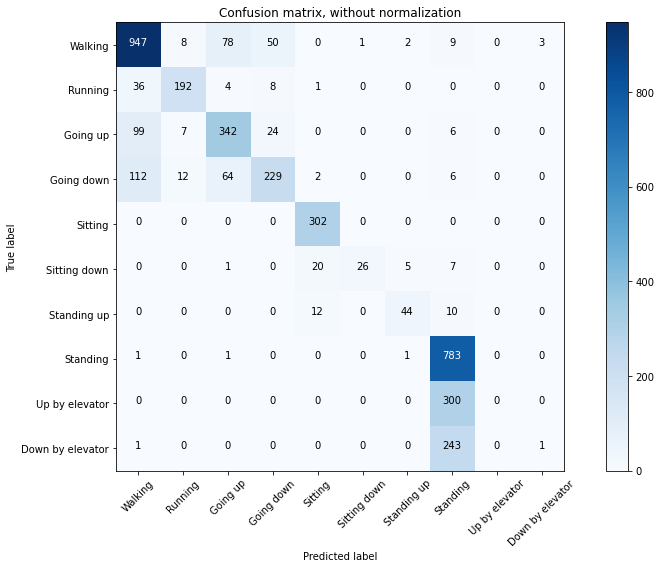

loss 0.61124 acc 0.63611: 100%|██████████| 500/500 [06:47<00:00,  1.23it/s]

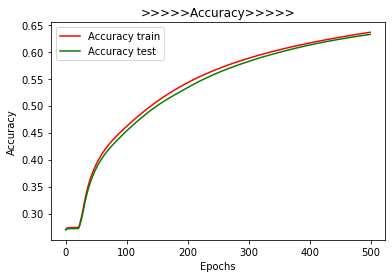

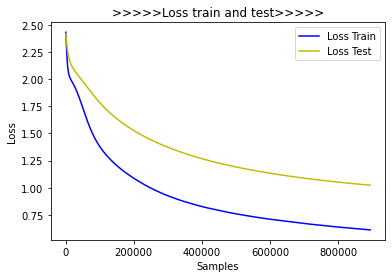

Accuracy de validación con kFold 0.7099609375
Accuracy Train: 0.7215625 
Accuracy Test: 0.71425 
Diferencia entre train y test: 0.007312499999999944

 


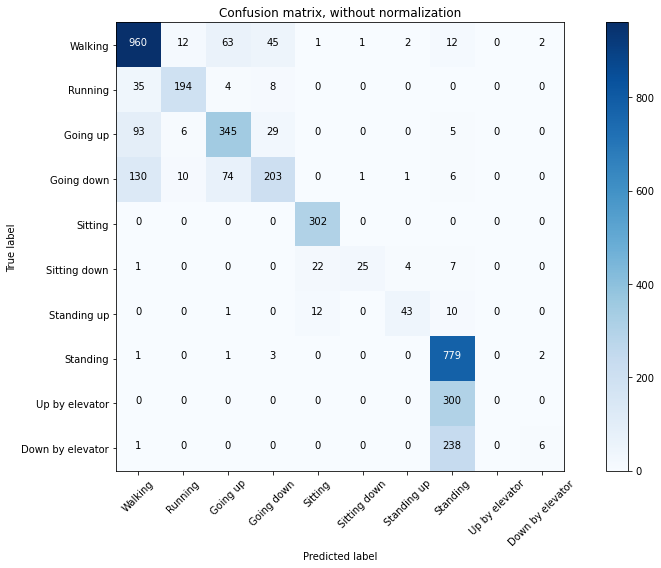

loss 0.60090 acc 0.63940: 100%|██████████| 500/500 [06:48<00:00,  1.23it/s]

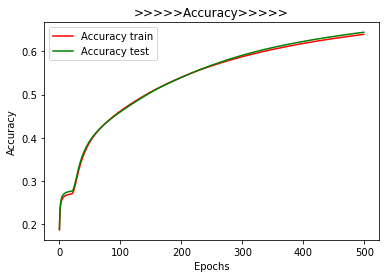

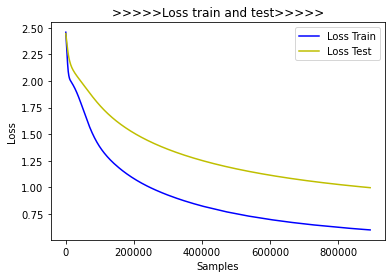

Accuracy de validación con kFold 0.7127976190476191
Accuracy Train: 0.7280625 
Accuracy Test: 0.717 
Diferencia entre train y test: 0.011062499999999975

 


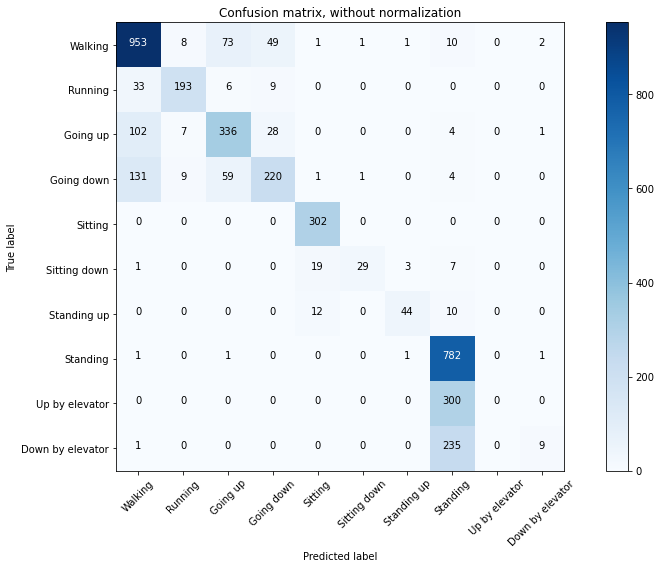

loss 0.62847 acc 0.62382: 100%|██████████| 500/500 [06:46<00:00,  1.23it/s]

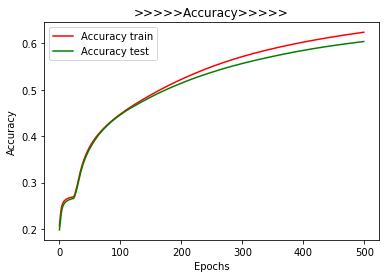

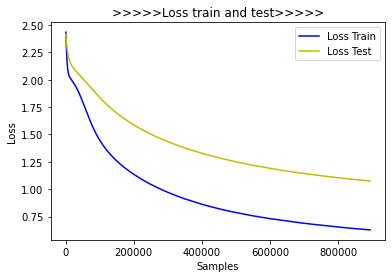

Accuracy de validación con kFold 0.7098772321428571
Accuracy Train: 0.71125 
Accuracy Test: 0.70525 
Diferencia entre train y test: 0.006000000000000005

 


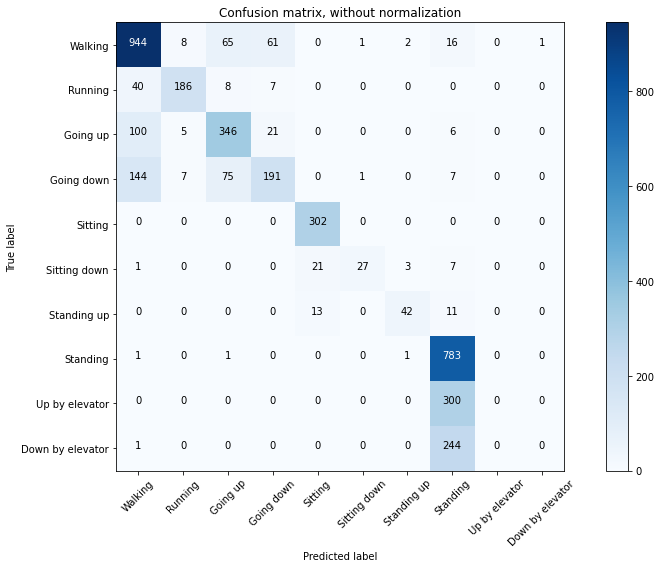

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 1h 8m 54s
============ Launch with 20000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.01 lr, 100 Hidden neurons ============


loss 0.44980 acc 0.69800: 100%|██████████| 500/500 [06:44<00:00,  1.24it/s]

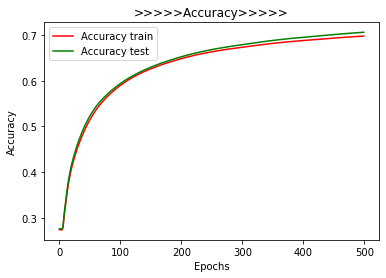

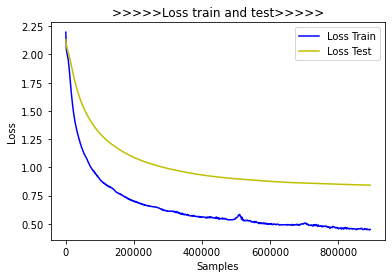

Accuracy de validación con kFold 0.74609375
Accuracy Train: 0.7395625 
Accuracy Test: 0.724 
Diferencia entre train y test: 0.015562500000000035

 


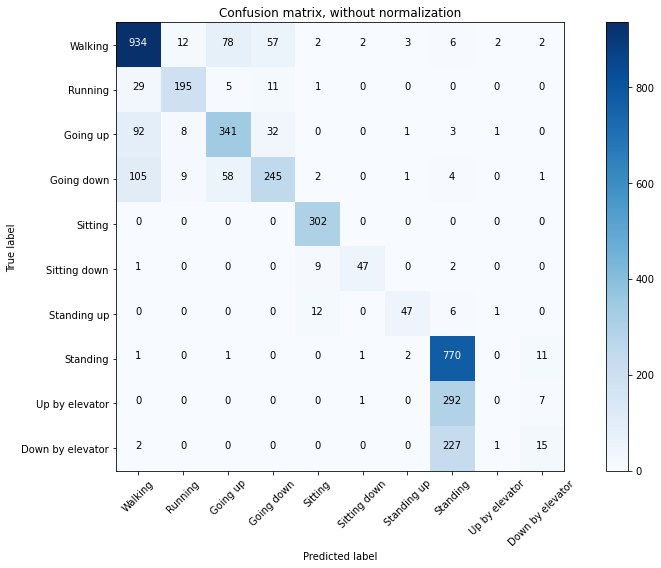

loss 0.40473 acc 0.69667: 100%|██████████| 500/500 [06:46<00:00,  1.23it/s]

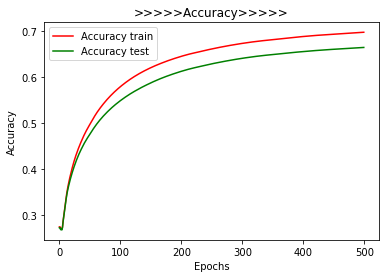

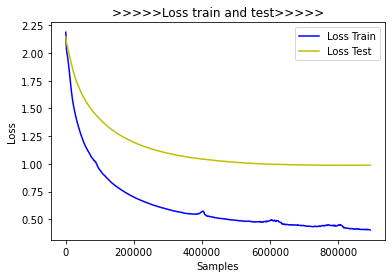

Accuracy de validación con kFold 0.7223772321428572
Accuracy Train: 0.7330625 
Accuracy Test: 0.7135 
Diferencia entre train y test: 0.019562499999999927

 


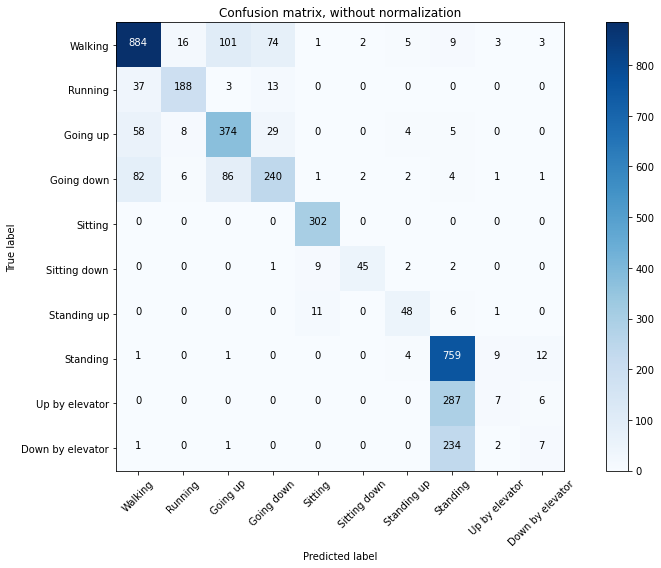

loss 0.44640 acc 0.69085: 100%|██████████| 500/500 [06:51<00:00,  1.22it/s]

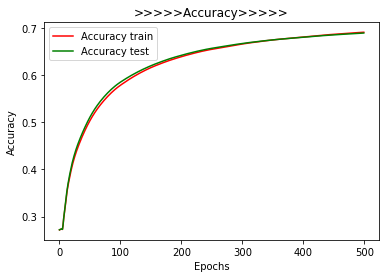

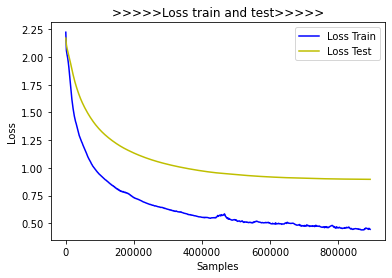

Accuracy de validación con kFold 0.7245163690476191
Accuracy Train: 0.7310625 
Accuracy Test: 0.717 
Diferencia entre train y test: 0.014062499999999978

 


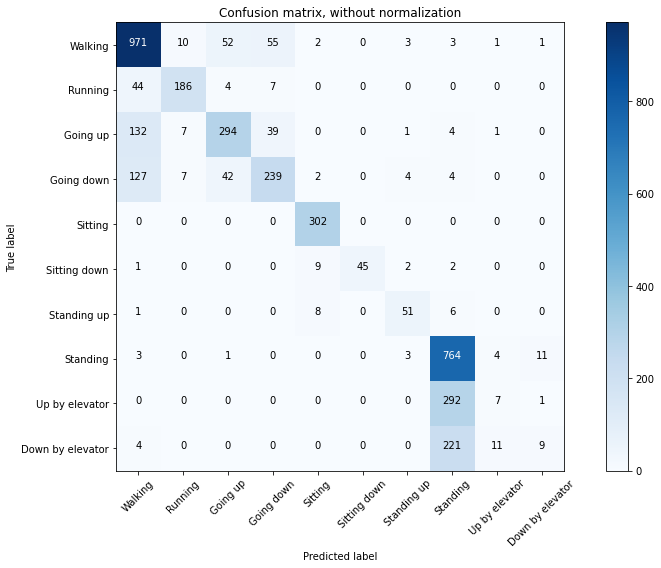

loss 0.40649 acc 0.70479: 100%|██████████| 500/500 [06:50<00:00,  1.22it/s]

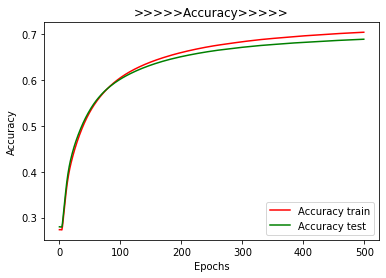

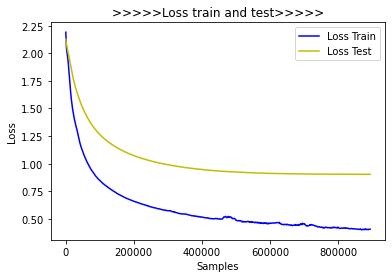

Accuracy de validación con kFold 0.7205636160714286
Accuracy Train: 0.7305625 
Accuracy Test: 0.71425 
Diferencia entre train y test: 0.016312499999999952

 


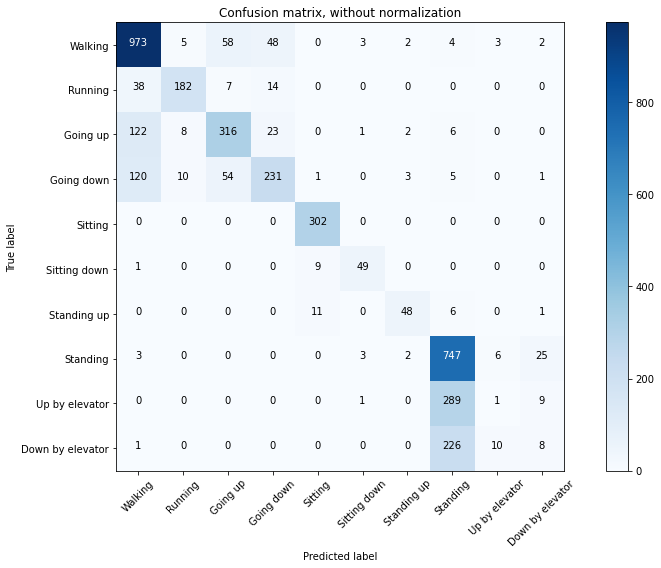

loss 0.41312 acc 0.69417: 100%|██████████| 500/500 [07:02<00:00,  1.20it/s]

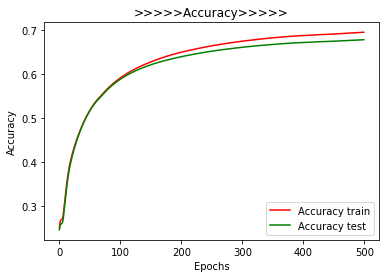

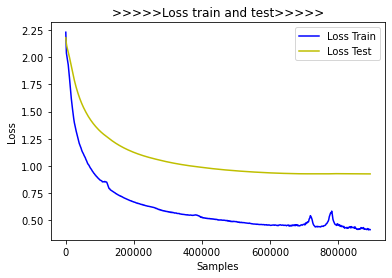

Accuracy de validación con kFold 0.7190848214285714
Accuracy Train: 0.7325625 
Accuracy Test: 0.71875 
Diferencia entre train y test: 0.013812500000000005

 


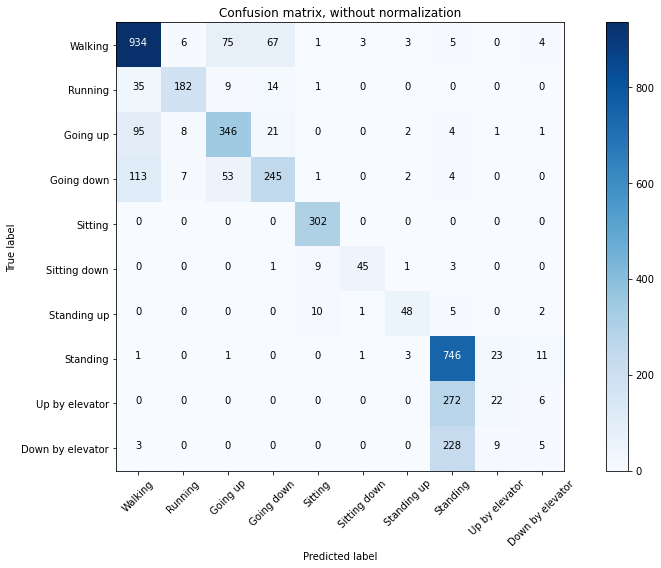

loss 0.43661 acc 0.69406: 100%|██████████| 500/500 [06:53<00:00,  1.21it/s]

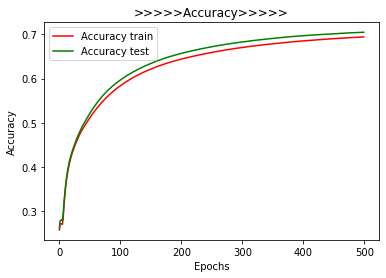

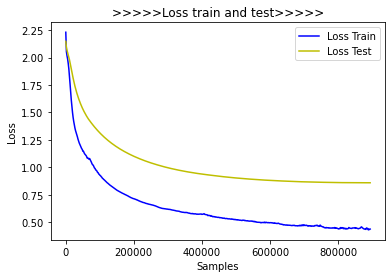

Accuracy de validación con kFold 0.7210751488095238
Accuracy Train: 0.729375 
Accuracy Test: 0.7155 
Diferencia entre train y test: 0.01387499999999997

 


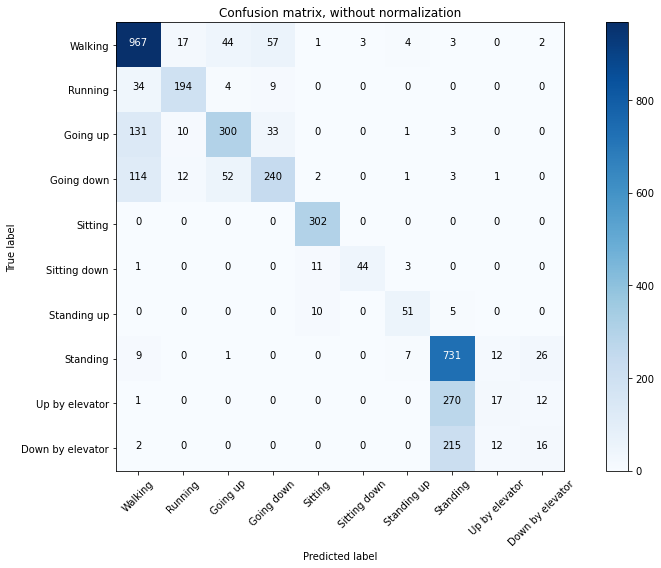

loss 0.41223 acc 0.68765: 100%|██████████| 500/500 [06:52<00:00,  1.22it/s]

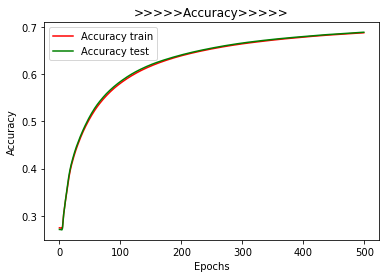

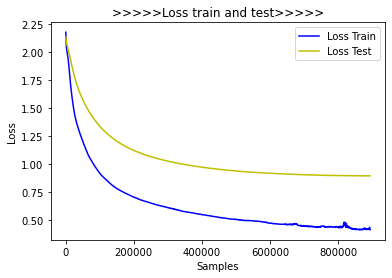

Accuracy de validación con kFold 0.7188297193877552
Accuracy Train: 0.702875 
Accuracy Test: 0.686 
Diferencia entre train y test: 0.016874999999999973

 


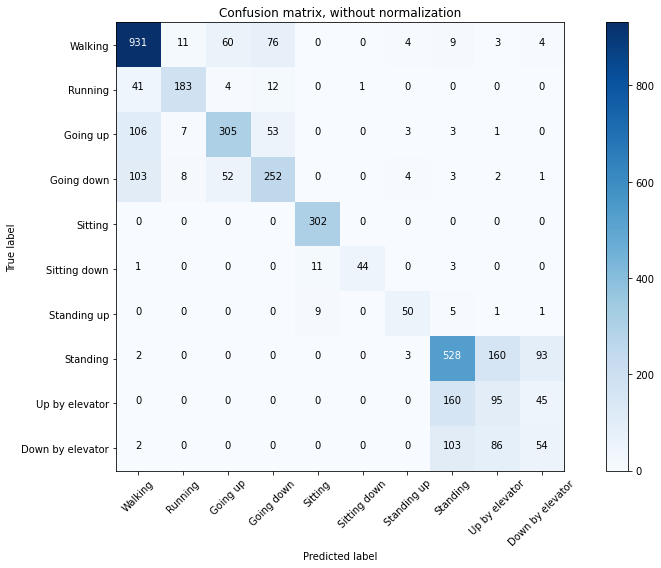

loss 0.48761 acc 0.69079: 100%|██████████| 500/500 [06:55<00:00,  1.21it/s]

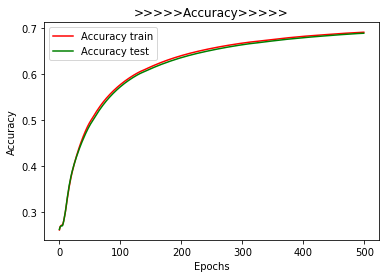

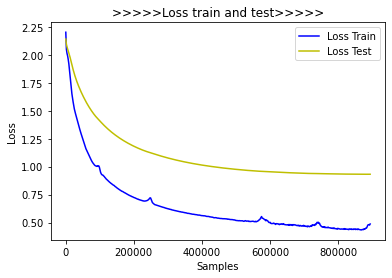

Accuracy de validación con kFold 0.7179827008928572
Accuracy Train: 0.7095625 
Accuracy Test: 0.70325 
Diferencia entre train y test: 0.006312499999999943

 


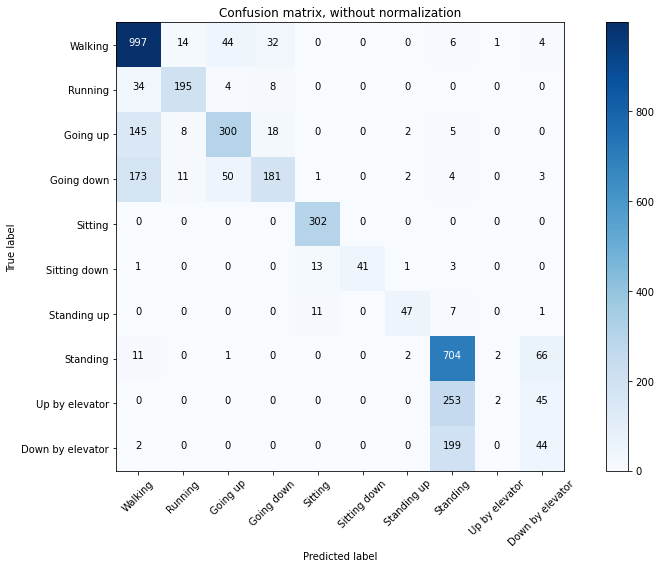

loss 0.41561 acc 0.70276:  88%|████████▊ | 440/500 [06:05<00:49,  1.21it/s]

OVERFFITING|Epochs: 440/500|Loss test old: 0.9024403383667446|loss test new: 0.9024689491499555


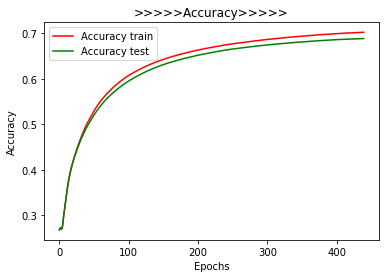

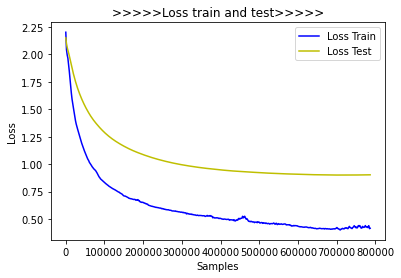

Accuracy de validación con kFold 0.7183159722222223
Accuracy Train: 0.737 
Accuracy Test: 0.73025 
Diferencia entre train y test: 0.006750000000000034

 


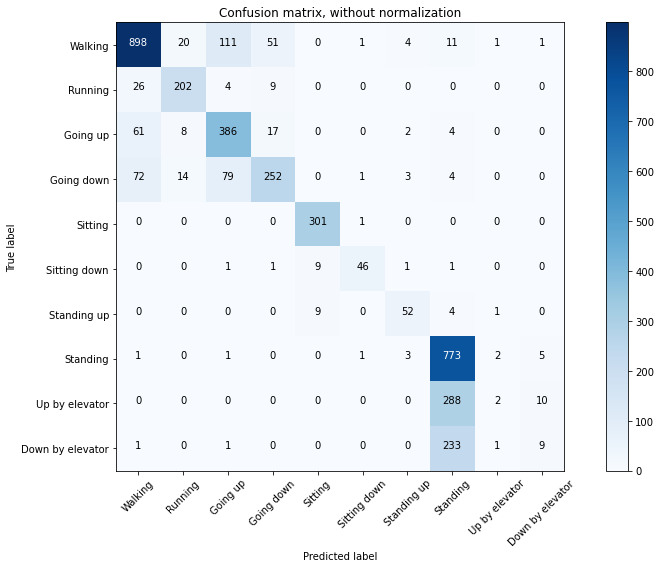

loss 0.42006 acc 0.70067: 100%|██████████| 500/500 [06:56<00:00,  1.20it/s]

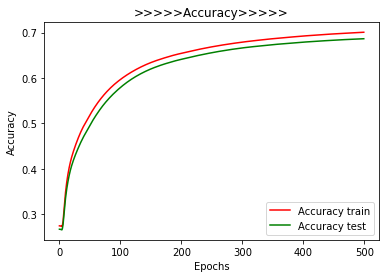

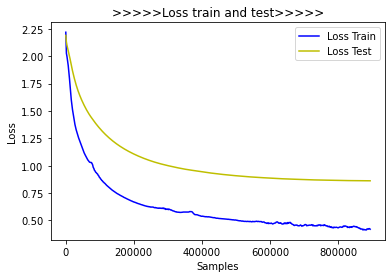

Accuracy de validación con kFold 0.7180245535714287
Accuracy Train: 0.73825 
Accuracy Test: 0.722 
Diferencia entre train y test: 0.016249999999999987

 


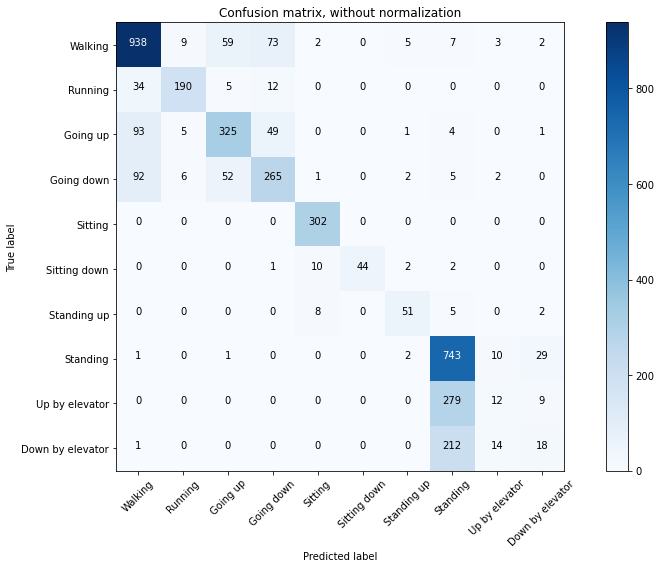

Time: 1h 8m 30s
============ Launch with 20000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.1 lr, 100 Hidden neurons ============


loss 1.63017 acc 0.37375: 100%|██████████| 500/500 [06:54<00:00,  1.21it/s]

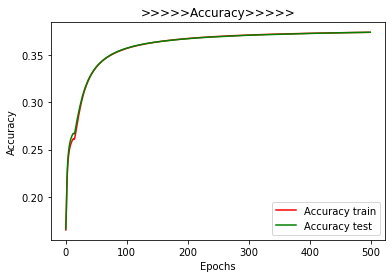

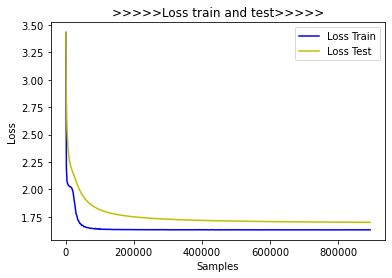

Accuracy de validación con kFold 0.3950892857142857
Accuracy Train: 0.3875 
Accuracy Test: 0.39 
Diferencia entre train y test: -0.0025000000000000022

 


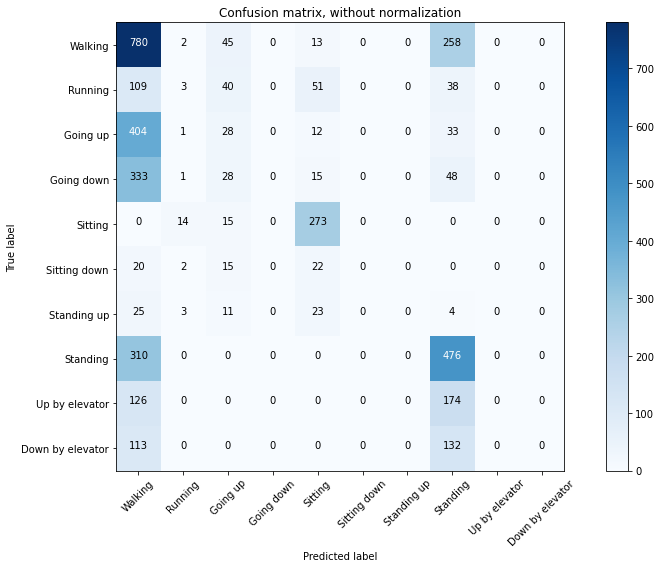

loss 1.63856 acc 0.36407: 100%|██████████| 500/500 [06:56<00:00,  1.20it/s]

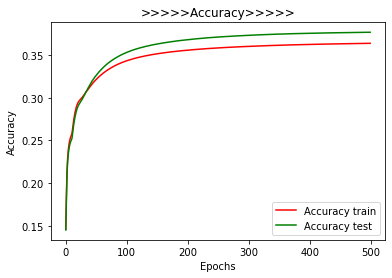

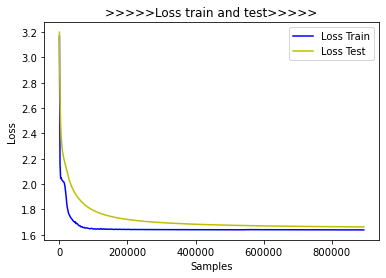

Accuracy de validación con kFold 0.3950892857142857
Accuracy Train: 0.3815 
Accuracy Test: 0.386 
Diferencia entre train y test: -0.004500000000000004

 


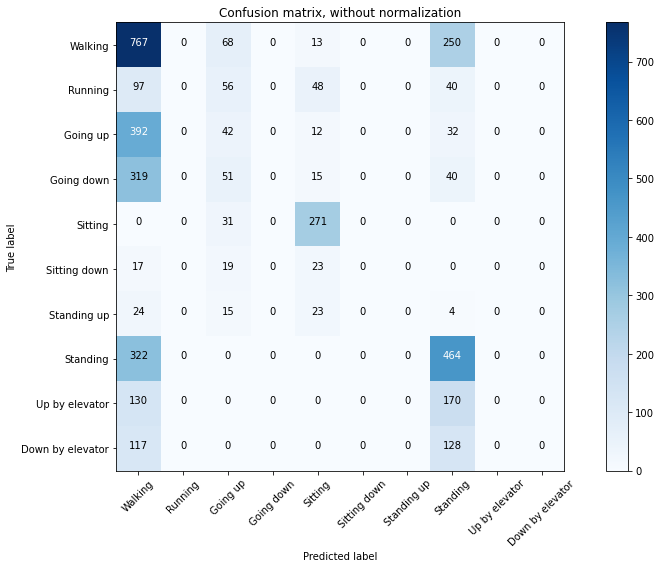

loss 1.66954 acc 0.47706:  80%|████████  | 400/500 [05:32<01:22,  1.22it/s]

OVERFFITING|Epochs: 400/500|Loss test old: 1.5362727059457535|loss test new: 1.5369046419858932


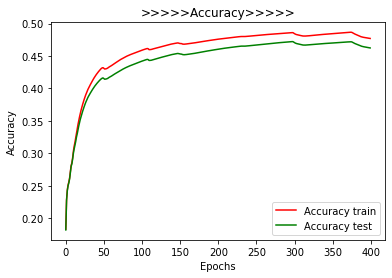

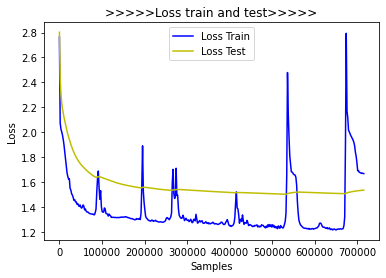

Accuracy de validación con kFold 0.39006696428571425
Accuracy Train: 0.3989375 
Accuracy Test: 0.396 
Diferencia entre train y test: 0.002937499999999982

 


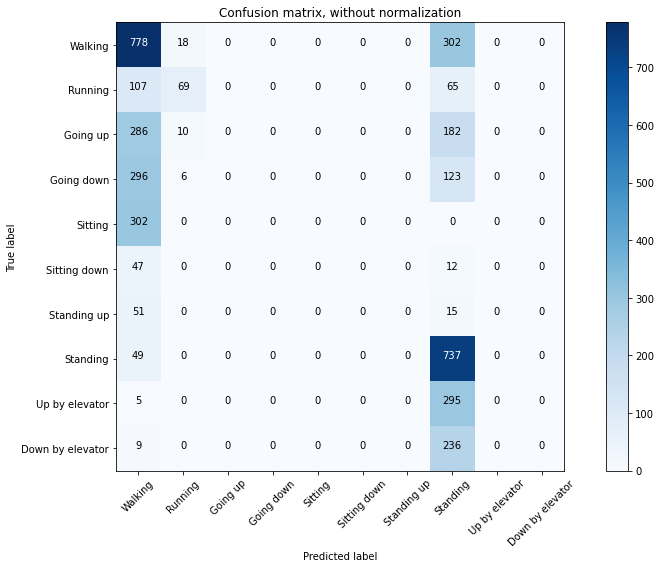

loss 1.25513 acc 0.49474: 100%|██████████| 500/500 [06:55<00:00,  1.21it/s]

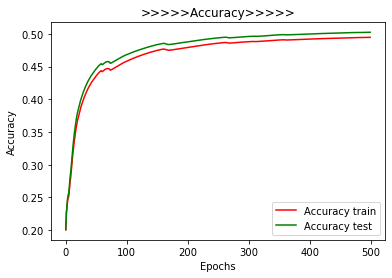

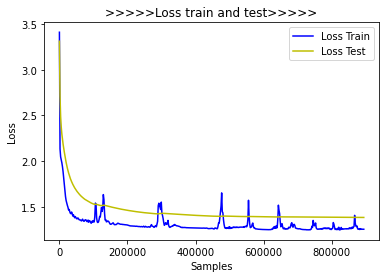

Accuracy de validación con kFold 0.4206194196428571
Accuracy Train: 0.5065625 
Accuracy Test: 0.5065 
Diferencia entre train y test: 6.250000000007638e-05

 


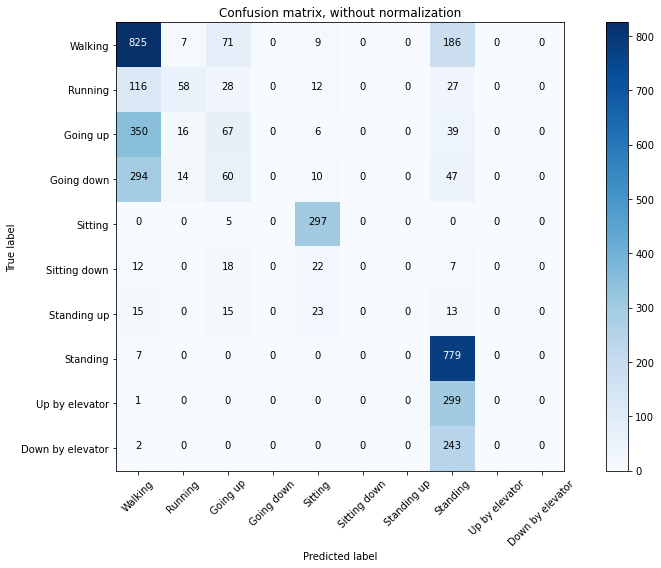

loss 1.62496 acc 0.37551: 100%|██████████| 500/500 [07:34<00:00,  2.40s/it]

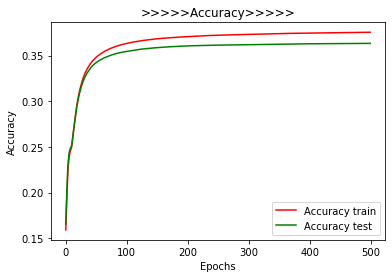

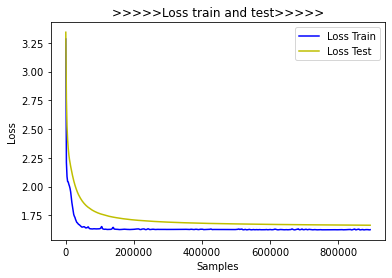

Accuracy de validación con kFold 0.4146205357142857
Accuracy Train: 0.401625 
Accuracy Test: 0.40375 
Diferencia entre train y test: -0.002124999999999988

 


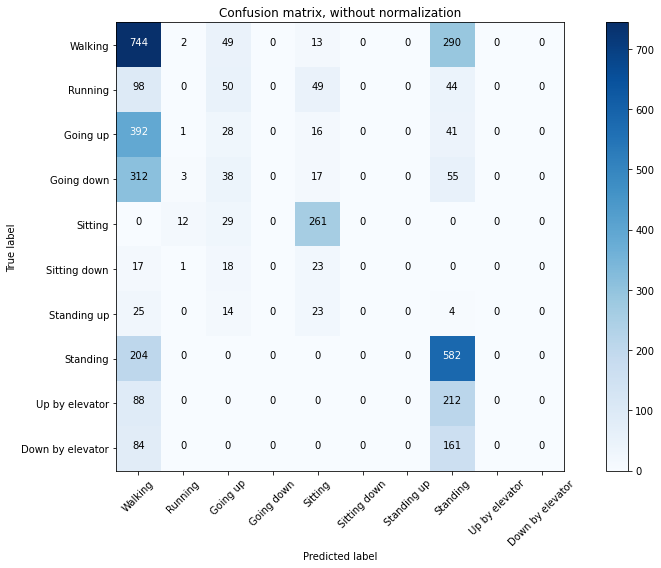

loss 1.68335 acc 0.32551: 100%|██████████| 500/500 [17:30<00:00,  1.93s/it]

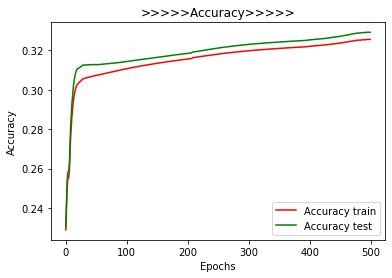

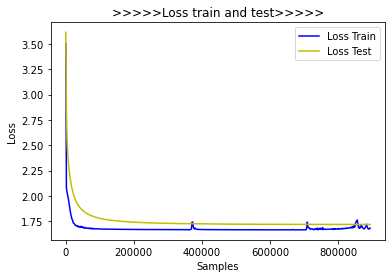

Accuracy de validación con kFold 0.39815848214285715
Accuracy Train: 0.314875 
Accuracy Test: 0.31875 
Diferencia entre train y test: -0.003874999999999962

 


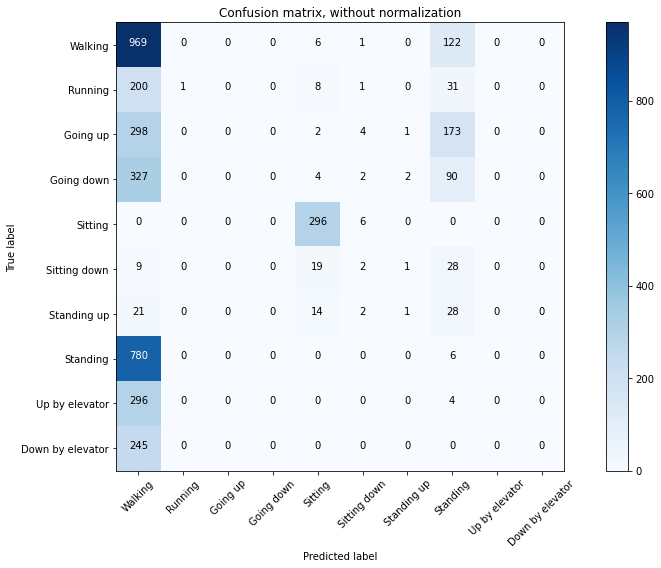

loss 1.66436 acc 0.34576: 100%|██████████| 500/500 [17:47<00:00,  2.12s/it]

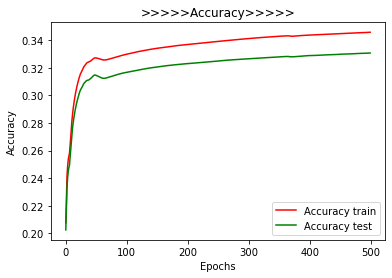

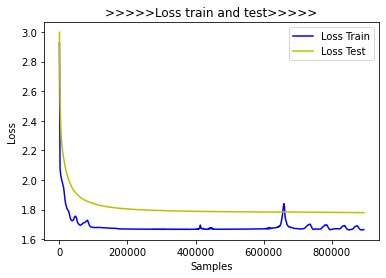

Accuracy de validación con kFold 0.38919005102040816
Accuracy Train: 0.355875 
Accuracy Test: 0.36775 
Diferencia entre train y test: -0.011875000000000024

 


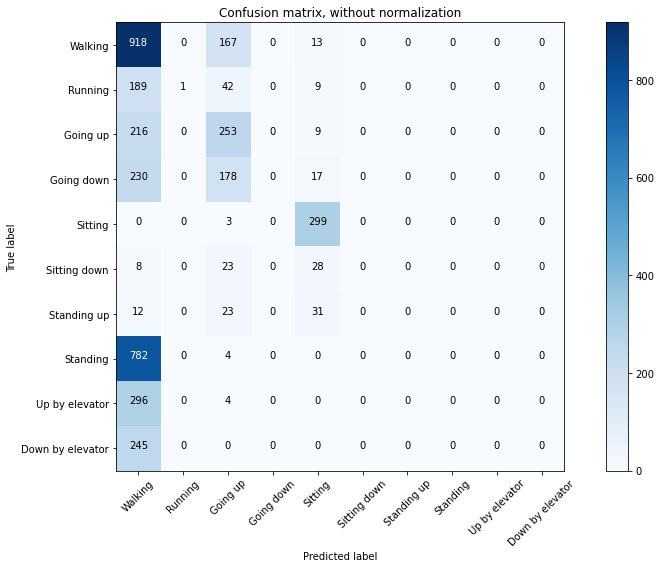

loss 1.22270 acc 0.53316:  50%|█████     | 250/500 [08:59<08:40,  2.08s/it]

OVERFFITING|Epochs: 250/500|Loss test old: 1.2419604512377163|loss test new: 1.2420262244769504


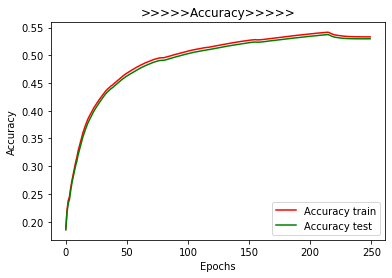

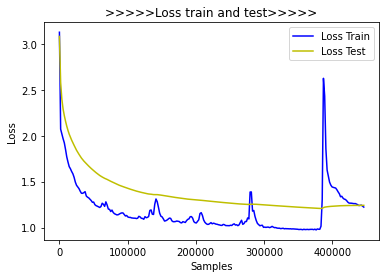

Accuracy de validación con kFold 0.4082728794642857
Accuracy Train: 0.5455625 
Accuracy Test: 0.5525 
Diferencia entre train y test: -0.006937500000000041

 


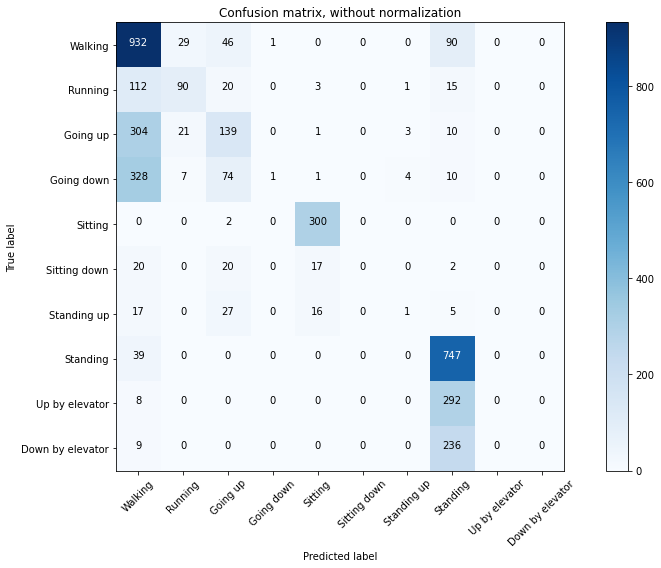

loss 1.68448 acc 0.35439: 100%|██████████| 500/500 [17:56<00:00,  2.20s/it]

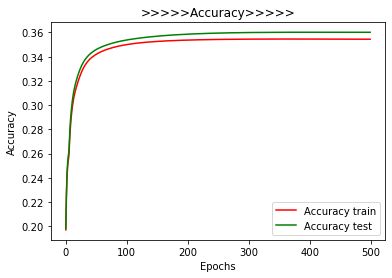

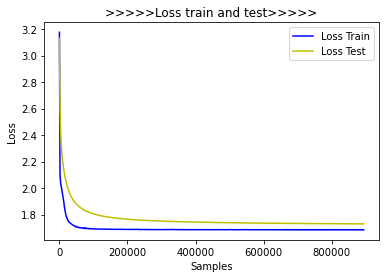

Accuracy de validación con kFold 0.4035838293650793
Accuracy Train: 0.3576875 
Accuracy Test: 0.36225 
Diferencia entre train y test: -0.004562500000000025

 


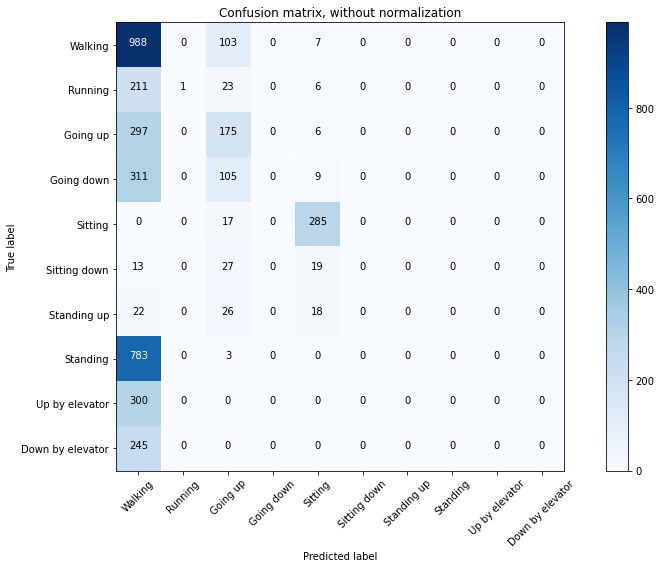

loss 1.29736 acc 0.48696: 100%|██████████| 500/500 [17:44<00:00,  2.13s/it]

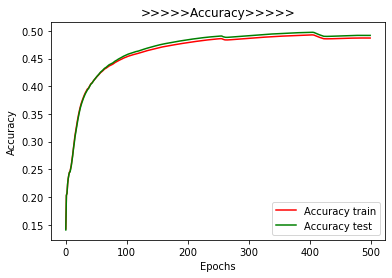

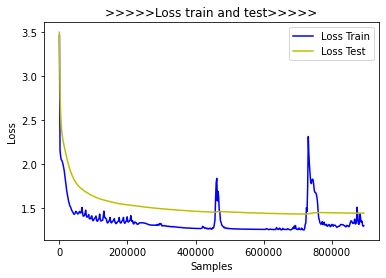

Accuracy de validación con kFold 0.4145647321428571
Accuracy Train: 0.512875 
Accuracy Test: 0.50675 
Diferencia entre train y test: 0.006124999999999936

 


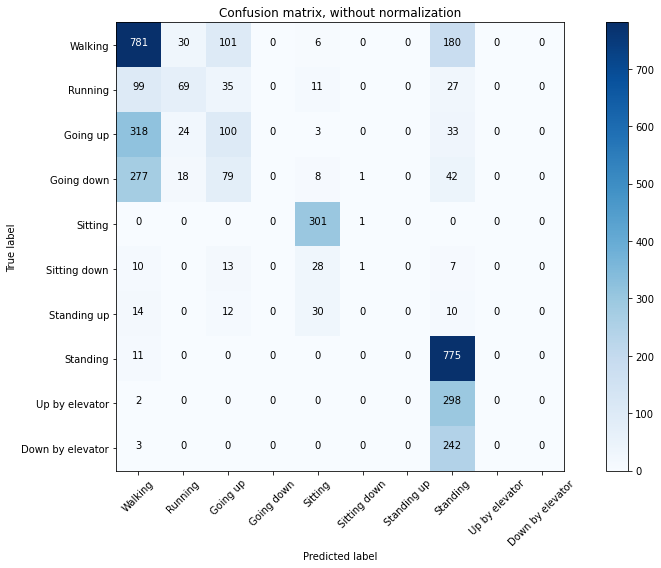

Time: 1h 51m 8s


In [17]:
for learning_rate in list_learning_rate:
    print(f'\033[1;36m============ Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size} Batch, {num_splits} Splits, {learning_rate} lr, {hidden_size} Hidden neurons ============\033[0;m')
    #  Llamo al metodo que implementa el K-fold
    time_mean, modelo_trained, loss_test_list, acc_test= Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                                   y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                                   learning_rate, (X_test, y_test), modelo_pre_train)

In [18]:
# Muestro el tiempo medio del entrenamiento de mi red neuronal 
if(time_mean> 3600):
    print(f'\nTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s')
elif(time_mean> 60):
    print(f'\nTime: {int(time_mean /60)}m {time_mean%60}s')
else:
    print(f'\nTime: {time_mean}')



Time: 1h 51m 8s


In [19]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.5478520620204604


In [20]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()